# **Credit Card Fraud Detection Using Machine Learning**
##### by __Hari Kiran__

## Setting Up the Environment

#### Importing Required Modules

In [2]:
# Modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Utils
from sklearn.preprocessing import StandardScaler # for data normalization
from sklearn.model_selection import train_test_split # for data split

# Machine Learning Models
from sklearn.tree import DecisionTreeClassifier # Decision tree algorithm
from sklearn.neighbors import KNeighborsClassifier # KNN algorithm
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm

# Evaluation Metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc


#### About the data

The dataset contains transactions made by credit cards in September 2013 by European cardholders.This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.


It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

#### Loading the data

In [3]:
data = pd.read_csv('.\data\creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Data Preprocessing and Exploratory Data Analysis

##### Checking dimension and datatypes of Dataset

In [4]:
data.shape

(284807, 31)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##### Checking for Null Values

In [6]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

##### Checking how many transactions of each type exitst in out dataset

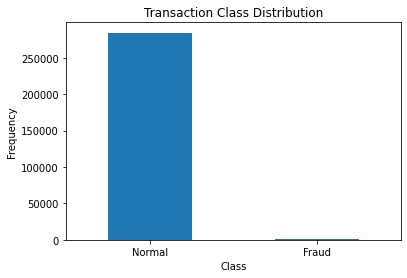

In [7]:
count_transactions = data['Class'].value_counts()
count_transactions.plot(kind='bar',rot=0)
plt.title("Transaction Class Distribution")
plt.xticks(range(2), ['Normal','Fraud'])
plt.xlabel("Class")
plt.ylabel("Frequency");

In [8]:
normal = data[data['Class']==0]
fraud = data[data['Class']==1]
print("Shapes: ")
print(f'Normal Transation: {normal.shape}')
print(f'Fraud Transation: {fraud.shape}')

Shapes: 
Normal Transation: (284315, 31)
Fraud Transation: (492, 31)


##### Amount of money used normal and fraud transactions

In [9]:
print('-'*5,"Normal Transactions",'-'*5)
print(normal['Amount'].describe())
print('-'*5,"Fraud Transactions",'-'*5)
print(fraud['Amount'].describe())

----- Normal Transactions -----
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
----- Fraud Transactions -----
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Representing above data in graph

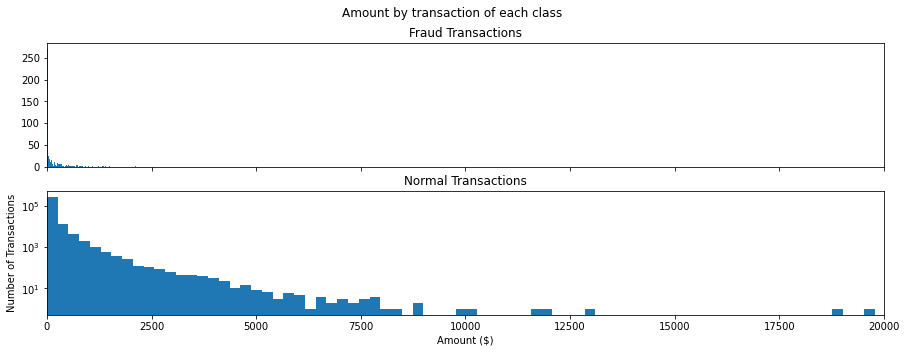

In [10]:
plot,(ax1,ax2) = plt.subplots(2,1,sharex=True,figsize=(15,5))
plot.suptitle('Amount by transaction of each class')

ax1.hist(fraud['Amount'],bins=100)
ax1.set_title("Fraud Transactions")


ax2.hist(normal['Amount'],bins=100)
ax2.set_title("Normal Transactions")

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log') #to change the scalling of the values for better visual
plt.show()

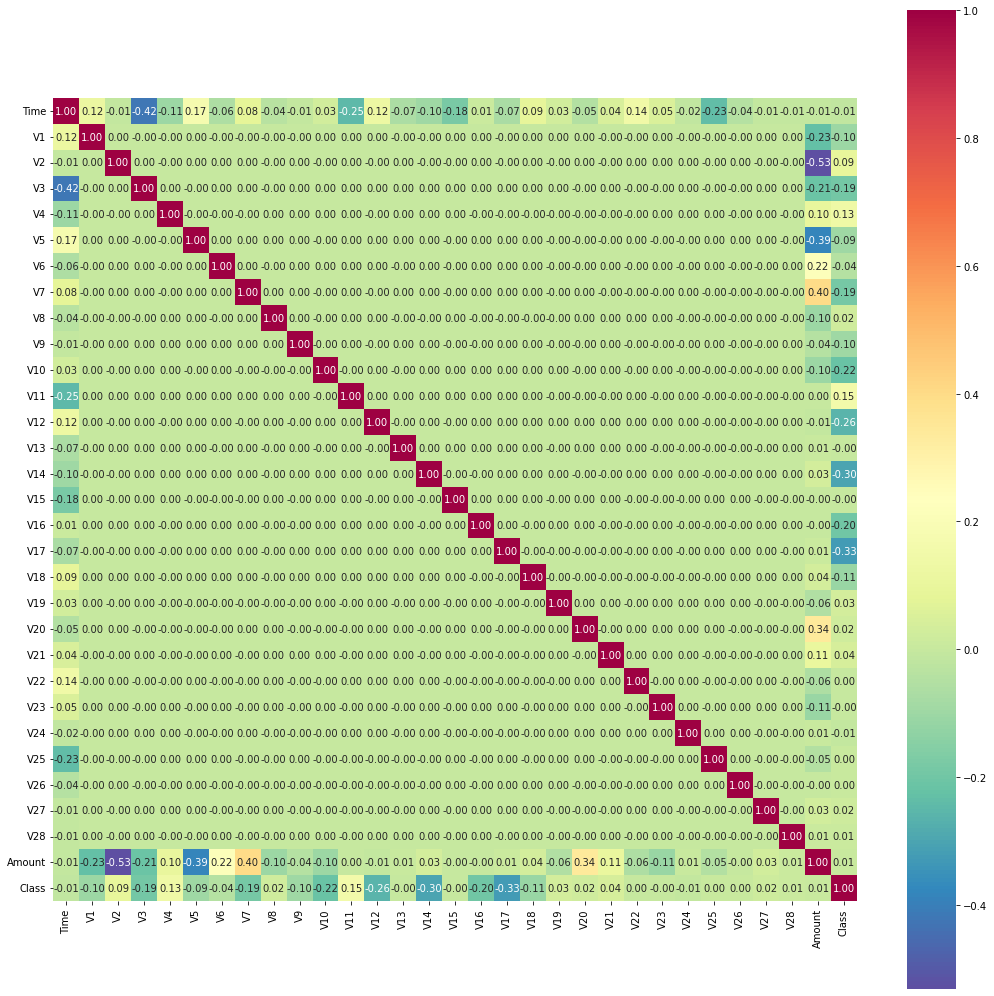

In [13]:
corrmat = data.corr()
plt.figure(figsize=(18, 18))
hm = sns.heatmap(corrmat, 
                 cbar=True, 
                 annot=True, 
                 square=True, 
                 fmt='.2f', 
                 annot_kws={'size': 10}, 
                 yticklabels=data.columns, 
                 xticklabels=data.columns, 
                 cmap="Spectral_r")
plt.show()

##### Observations:

- There 31 columns out of which 28 columns are output from PCA transformation labelled as (V1 - V28)
- Remaining 3 columns are Time, Amount and Class
- Time: It contains the seconds elapsed between each transaction and the first transaction in the dataset.
- Amount: It is the amount that was transfered.
- Class: It is the classification variable. 1 means Transaction is fraud and 0 means not fraud.
- There are no null values in any of the columns
- Clearly, Dataset is unbalanced as we have significantly more normal transcations than fraud transactions.

## Preparing Data

##### Normalizing Data, (since the Amount values are too high compared to other columns)

In [14]:
sc = StandardScaler()
amount = data['Amount'].values
data['Amount'] = sc.fit_transform(amount.reshape(-1, 1))
data['Amount'].head()

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
Name: Amount, dtype: float64

##### Data Splitting

In [15]:
# Droping Time Column, since there not much use with it
data.drop('Time',axis=1,inplace=True)

#Features
X = data.drop('Class',axis=1).values
#Target
y = data['Class'].values

# Splitting Data for testing and trainging

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 43)

In [16]:
print(f"Training Data: {X_train.shape}")
print(f"Testing Data: {X_test.shape}")

Training Data: (227845, 29)
Testing Data: (56962, 29)


## Building Models

##### Preparing the models
Here, I prepared 5 models which are available in sklearn module
- Decision Tree
- KNN
- Logistic Classification
- SVM
- Random Forest Classification

In [17]:
# 1. Decision Tree

decision_tree = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)


# 2. K-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn_pred = knn.predict(X_test)


# 3. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)


# 4. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)


# 5. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

## Evaluation of the models

Metrics used:
- Accuracy Score
- F1 Score
- Recall Score
- Confusion Matrix
- Precision Vs Recall Curve
- ROC Curve

##### Helper Functions

In [18]:
model_names = ['Decision Tree','KNN','Logistic Regression','SVM','Random Forest']
pred_data = [decision_tree_pred,knn_pred,lr_pred,svm_pred,rf_pred]
# To plot bar graphs 
def plot_bargraph(model,xlabel):
    model_score = []
    for pred in pred_data:
        score = model(y_test,pred)
        model_score.append(score)

    fig,ax = plt.subplots()

    bars = ax.bar(model_names,model_score)
    ax.set_ylabel(xlabel)
    ax.set_xlabel('ML Models')
    ax.set_title(f"{xlabel} of ML Models")
    ax.bar_label(bars,fontsize=10,padding=-16,color='w')
    ax.set_ylim(top=1.1)
    plt.show()
    
# to get metric data in (2,3) format which is used in sub plotting
def get_models_metric_data(metric):
    k = 0
    models_metric_data = []
    for i in range(2):
        row=[]
        for j in range(3):
            try:
                metric_data = metric(y_test,pred_data[k])
                row.append({"model_name":model_names[k],"data":metric_data})
                k+=1
            except IndexError:
                pass
        models_metric_data.append(row)
    return models_metric_data

##### Accuracy Score

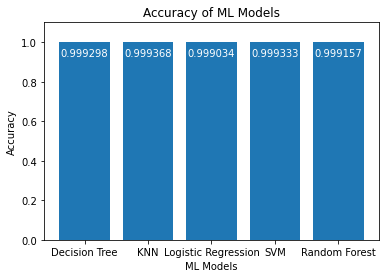

In [19]:
plot_bargraph(accuracy_score,"Accuracy")

##### F1 Score

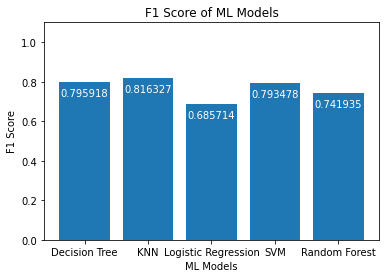

In [20]:
plot_bargraph(f1_score,"F1 Score")

##### Recall Score

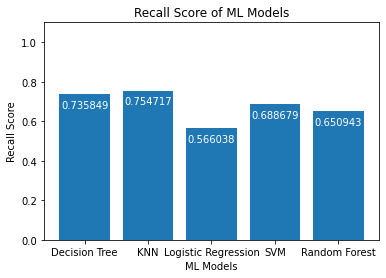

In [21]:
plot_bargraph(recall_score,"Recall Score")

##### Confusion Matrix

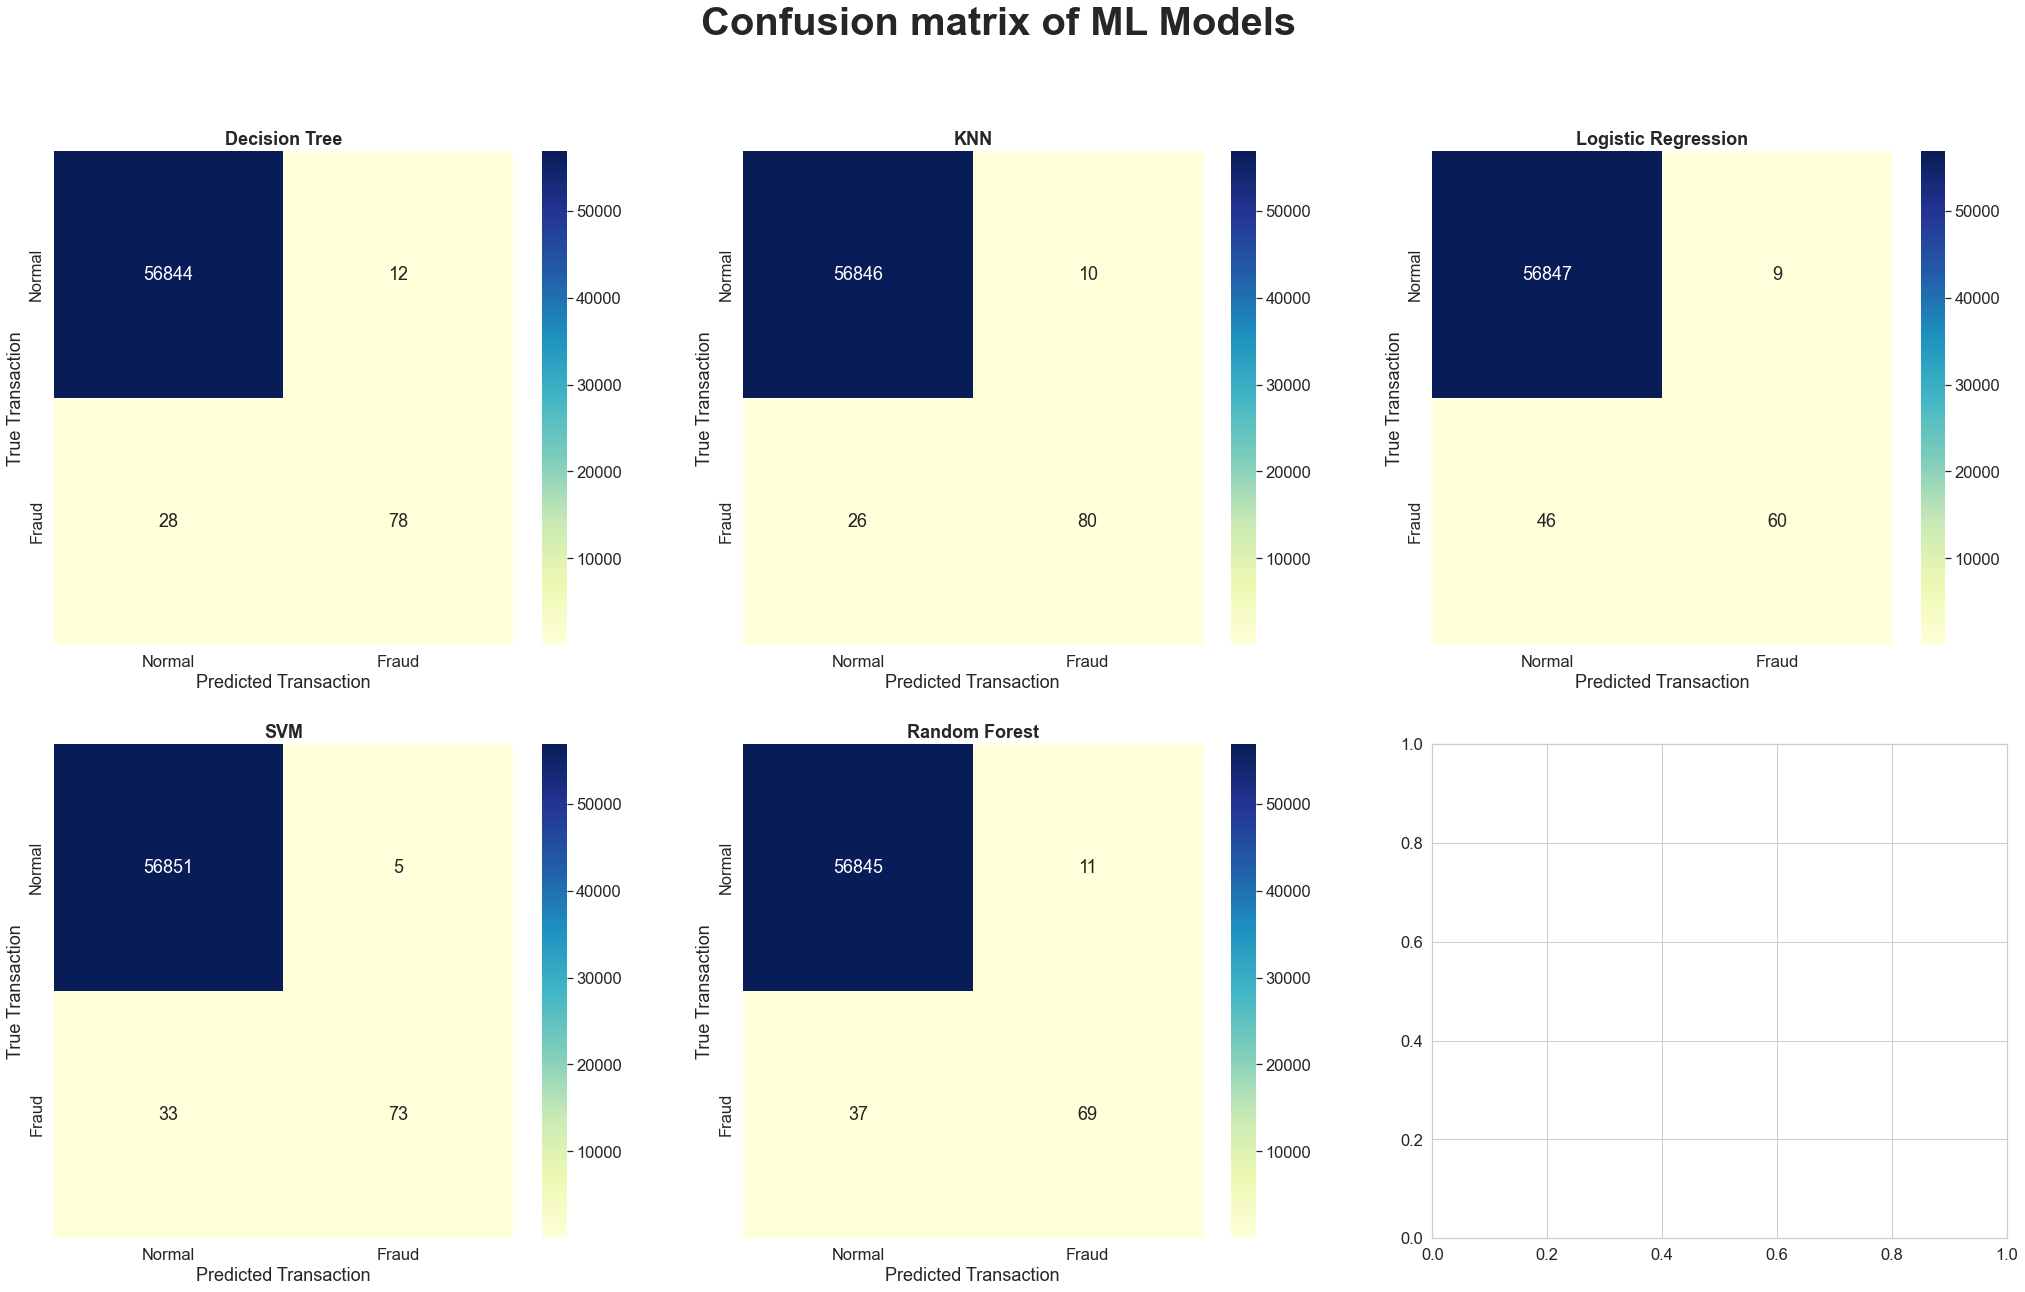

In [22]:
cm_models_metric_data = get_models_metric_data(confusion_matrix)
sns.set(style='whitegrid', palette='muted', font_scale=1.5)
fig, axs = plt.subplots(2,3,figsize=(35,20))
for i in range(2):
    for j in range(3):
        try:
            sns.heatmap(cm_models_metric_data[i][j]['data'], xticklabels=['Normal','Fraud'], yticklabels=['Normal','Fraud'], annot=True, fmt="d",cmap="YlGnBu",ax=axs[i][j])
            axs[i][j].set_xlabel('Predicted Transaction')
            axs[i][j].set_ylabel('True Transaction')
            axs[i][j].set_title(cm_models_metric_data[i][j]['model_name'],fontweight='bold')
        except IndexError:
            pass
plt.suptitle("Confusion matrix of ML Models",fontsize=40,fontweight='bold')
plt.show()

##### Precision Vs Recall

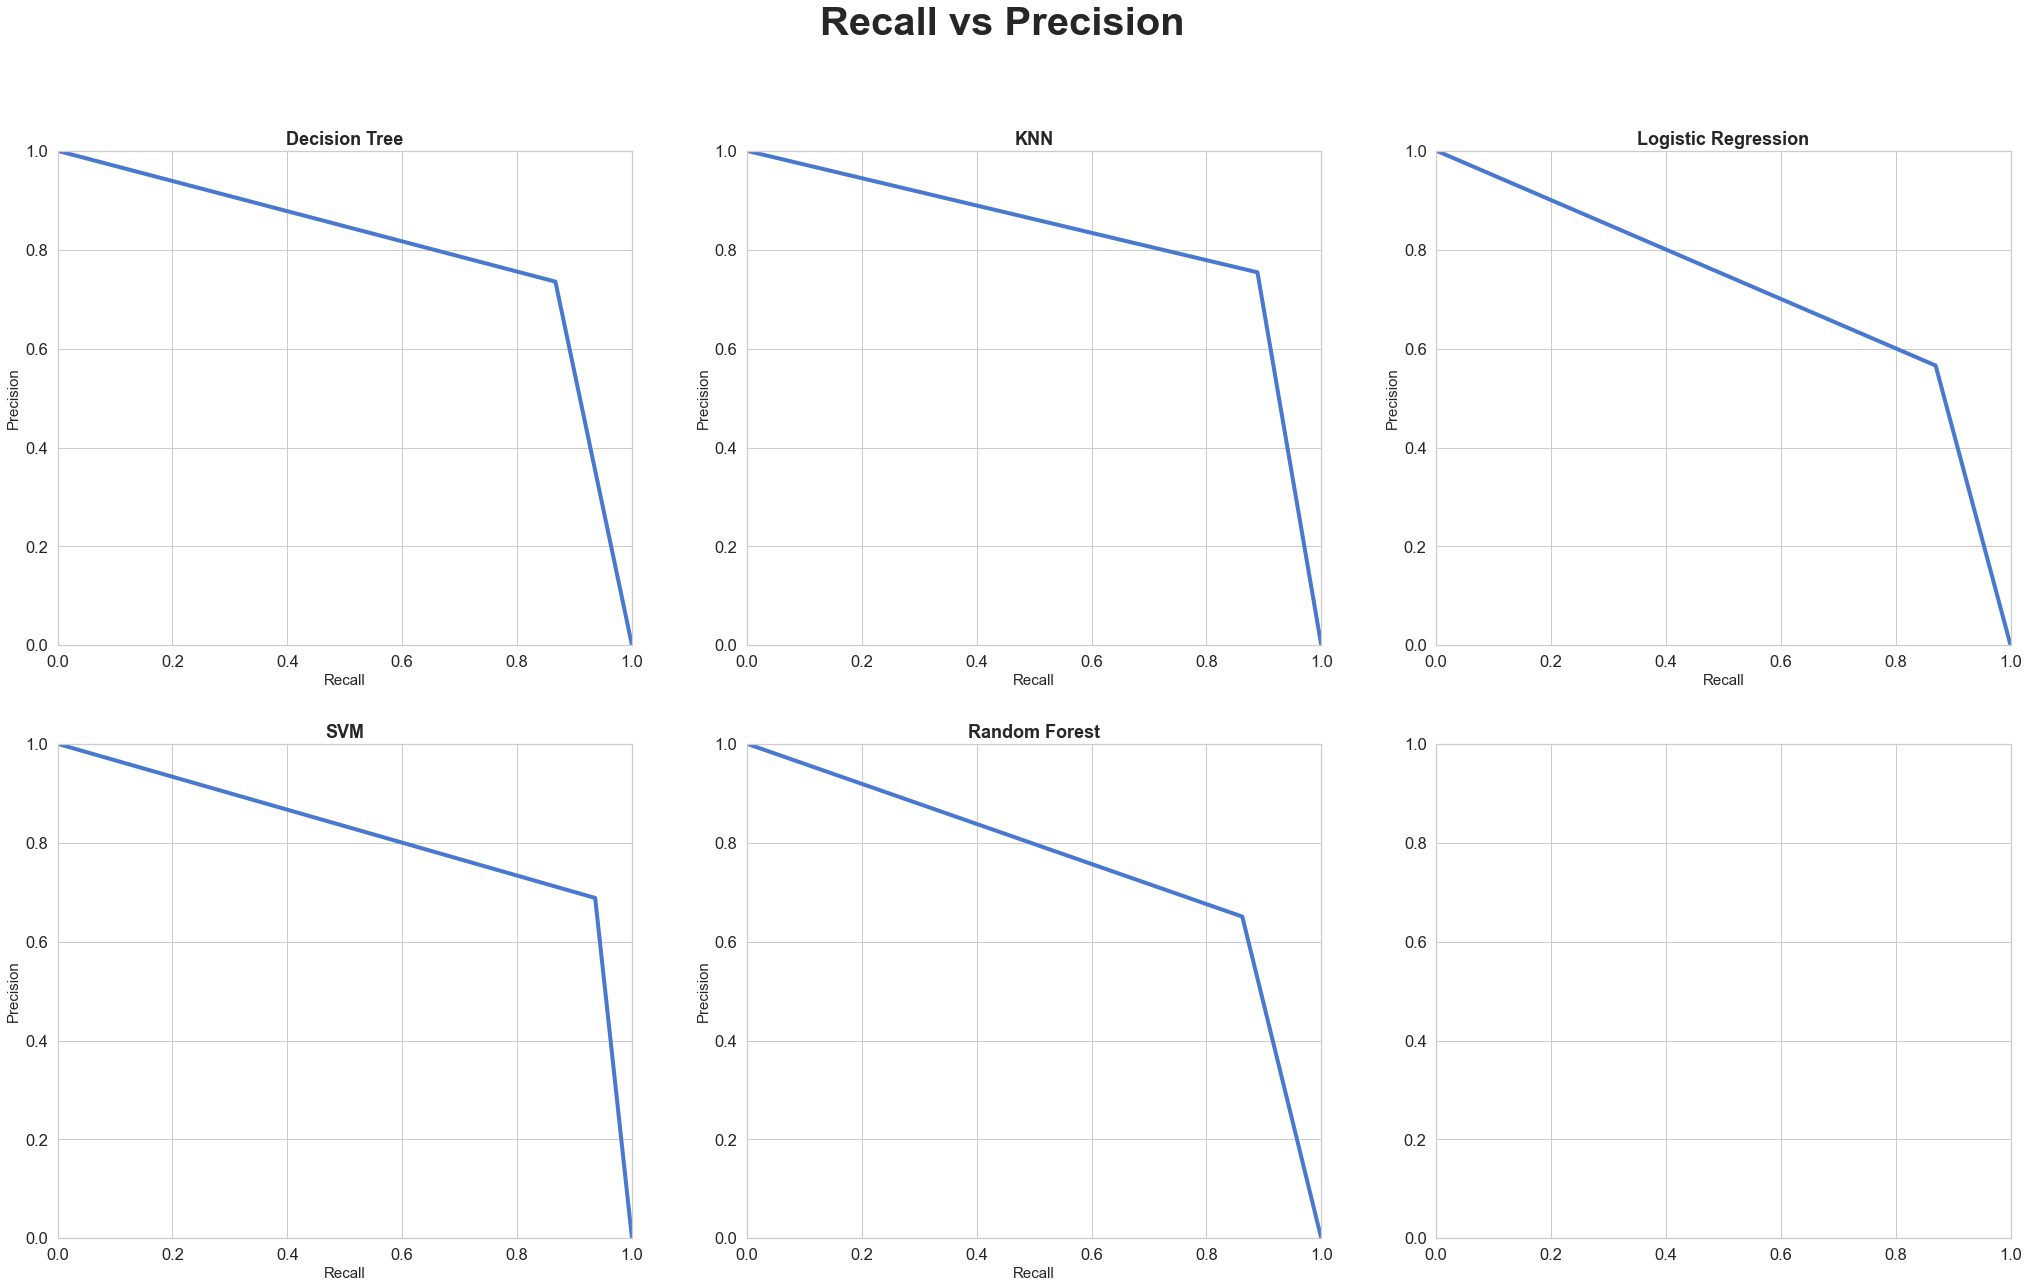

In [23]:
rp_models = get_models_metric_data(precision_recall_curve)
fig, axs = plt.subplots(2,3,figsize=(35,20))
for i in range(2):
    for j in range(3):
        try:
            recall = rp_models[i][j]['data'][0]
            precision = rp_models[i][j]['data'][1]
            axs[i][j].plot(recall, precision, 'b',linewidth=4)
            axs[i][j].set_xlabel('Recall',fontsize=15)
            axs[i][j].set_ylabel('Precision',fontsize=15)
            axs[i][j].set_title(rp_models[i][j]['model_name'],fontweight='bold')
            axs[i][j].set_ylim(0,1)
            axs[i][j].set_xlim(0,1)
        except IndexError:
            pass
plt.suptitle('Recall vs Precision',fontsize=40,fontweight='bold')
plt.show()

##### ROC Curve

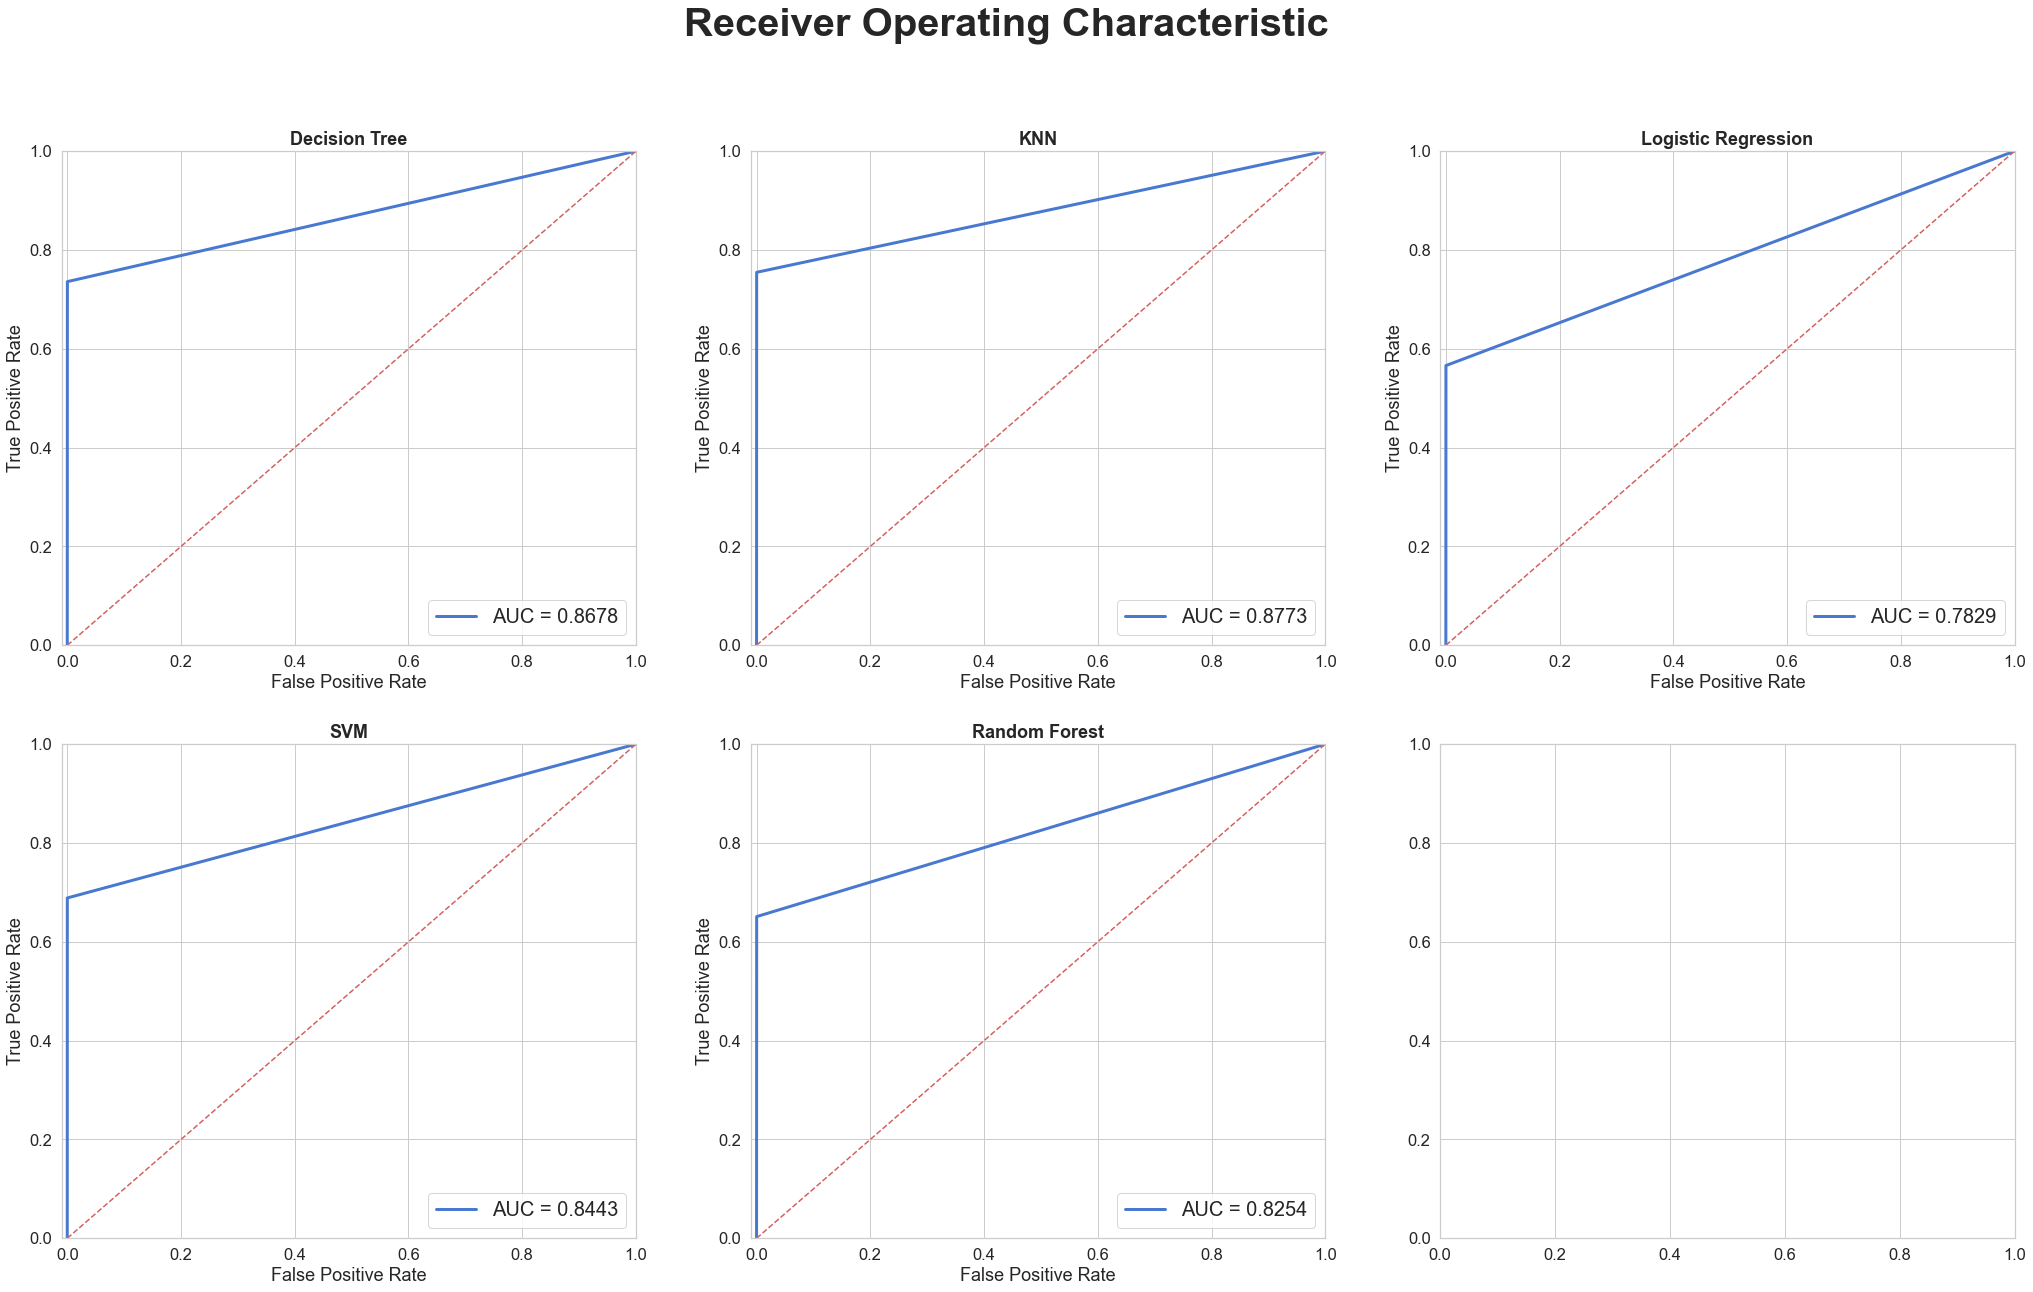

In [24]:
roc_data = get_models_metric_data(roc_curve)
fig, axs = plt.subplots(2,3,figsize=(35,20))
for i in range(2):
    for j in range(3):
        try:
            fpr = roc_data[i][j]['data'][0]
            tpr = roc_data[i][j]['data'][1]
            axs[i][j].plot(fpr, tpr, label='AUC = %0.4f'% auc(fpr, tpr),linewidth=3)
            axs[i][j].plot([0,1],[0,1],'r--')
            axs[i][j].set_xlabel('False Positive Rate')
            axs[i][j].set_ylabel('True Positive Rate')
            axs[i][j].set_title(roc_data[i][j]['model_name'],fontweight='bold')
            axs[i][j].set_ylim(0,1)
            axs[i][j].set_xlim(-0.01, 1)
            axs[i][j].legend(loc='lower right',fontsize=20)
        except IndexError:
            pass
plt.suptitle('Receiver Operating Characteristic',fontsize=40,fontweight='bold')
plt.show()

## Conclusion

For Credit card fraud detection classification, we built 5 Supervised Machine Learning Models. Even though all models gave good results, KNN seems to outperform all other models. 

In conclusion, **KNN algorithm** is best for credit card fraud detection.